# The Adult Income dataset
<b>Description</b>
Title of dataset: adult.csv


<b>Sources:</b>

* Original owners of database - US Census Bureau
* Donor of database - Ronny Kohavi and Barry Becker
* Date received - 05/19/96 

<b>Number of Instances(Rows)</b>

* 48842 instances, mix of continuous and discrete (train=32561, test=16281)
* 45222 if instances with unknown values are removed (train=30162, test=15060)
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

<b>Number of Attributes/Fearures/Columns</b>

* 6 numerical columns and 9 categorial columns

<b>Attribute Information/Fearures/Columns</b>

* <b>age</b>: age of individual, continuous.
* <b>workclass</b>: It represent employment sector of individual:-Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* <b>fnlwgt</b>: continuous.
*<b> education</b>: Highest level of education achieved by individual:- Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* <b>education-num</b>: continuous.
*<b> marital-status</b>: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* <b>occupation</b>: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* <b>relationship</b>: represents relation of Individual to others:-Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* <b>race</b>: represents skin colour of individual:-White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* <b>gender</b>:represents biological sex of individual:- Female, Male.
* <b>capital-gain</b>: represents capital-gain of individual,continuous.
* <b>capital-loss</b>: represents capital-loss of individual,continuous.
* <b>hours-per-week</b>: working hours of individual per week,continuous.
* <b>native-country</b>: represents residential country of individual:- United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* <b>income</b>: represents income of individual:- >50K, <=50K 

<b>Missing Values</b>:

 7% rows have missing values.

<h3><b>Objective</b></h3>
 <b>We have given following input variables/independent variables:-</b>
 
 - Age
 - Education
 - Hours-per-week
 - Educational-num
 - Native-country
 - Martial-Status
 - Relationship
 - Race
 - Gender
 - Occupation
 - Capital-gain
 - Capital-loss

<b>Predict:-</b>
 - we have to predict income of a person using above person data
 - We have to determine income of particular person is less than or greater than 50K

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [138]:
missing_value=['?','-','n/a']
df=pd.read_csv('adult.csv',na_values=missing_value)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [139]:
df.shape

(48842, 15)

In [140]:
df.describe(include='number')


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [141]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [142]:

len(df.index)

48842

<b><h3>Discover and Handle Missing Value</b></h3>

<b> Pattern in missing value</b>
 
  - both occupation and workclass are missing at random (MAR)because they are related to each other
  - Native-country is missing completely at random(MCAR) it is not dependent on anyone
  -Also When there is missing in workclass there is missing value in occupation both are missing value in same poistion

In [0]:
df.dropna(axis=0,how='any',inplace=True)

In [0]:
df.drop(['fnlwgt'],axis=1,inplace=True)

In [145]:
per_miss=(1 - len(df.index)/48842)*100
print("Missing Value Percentage: ",per_miss)

Missing Value Percentage:  7.411653904426519


<b><h1>Univaraint Anaylsis</h1></b>

Text(0.5, 1.0, 'Capital-Loss')

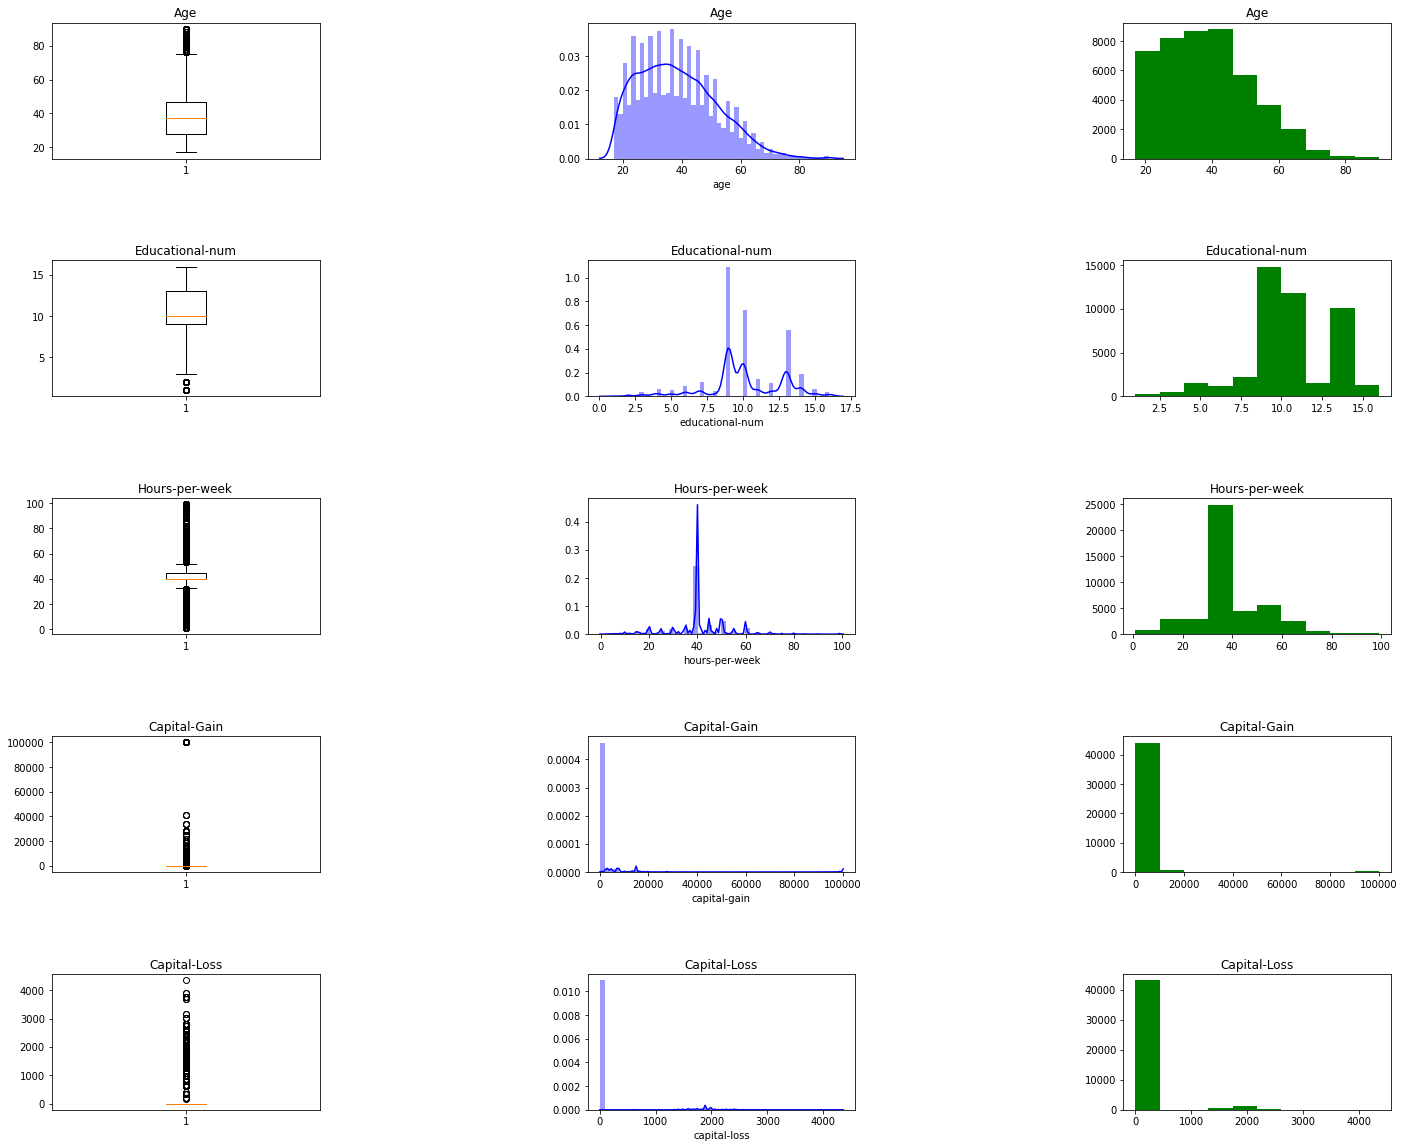

In [146]:
plt.figure(figsize=(24,20))
plt.subplots_adjust(wspace=1,hspace=0.75)
plt.subplot(5,3,1)
plt.boxplot(df.age)
plt.title("Age")
plt.subplot(5,3,2)
sns.distplot(df['age'],color='blue')
plt.title("Age")
plt.subplot(5,3,3)
plt.hist(df['age'],color='green')
plt.title("Age")
plt.subplot(5,3,4)
plt.boxplot(df['educational-num'])
plt.title("Educational-num")
plt.subplot(5,3,5)
sns.distplot(df['educational-num'],color='blue')
plt.title("Educational-num")
plt.subplot(5,3,6)
plt.hist(df['educational-num'],color='green')
plt.title("Educational-num")
plt.subplot(5,3,7)
plt.boxplot(df['hours-per-week'])
plt.title("Hours-per-week")
plt.subplot(5,3,8)
sns.distplot(df['hours-per-week'],color='blue')
plt.title("Hours-per-week")
plt.subplot(5,3,9)
plt.hist(df['hours-per-week'],color='green')
plt.title("Hours-per-week")
plt.subplot(5,3,10)
plt.boxplot(df['capital-gain'])
plt.title("Capital-Gain")
plt.subplot(5,3,11)
sns.distplot(df['capital-gain'],color='blue')
plt.title("Capital-Gain")
plt.subplot(5,3,12)
plt.hist(df['capital-gain'],color='green')
plt.title("Capital-Gain")
plt.subplot(5,3,13)
plt.boxplot(df['capital-loss'])
plt.title("Capital-Loss")
plt.subplot(5,3,14)
sns.distplot(df['capital-loss'],color='blue')
plt.title("Capital-Loss")
plt.subplot(5,3,15)
plt.hist(df['capital-loss'],color='green')
plt.title("Capital-Loss")




# <h5><b> Observations </b></h5>
 <b> Age(Boxplot)</b>
  -                              Average age could be approx 37
  - There are so many outliers outside the whiskers
  -  Also Outliers having very large value
  - Outliers lie above 78 age

<b>Age(PDF)</b>
  - It is poistive Skewed curve (skewness=0.5328)
  - In this graph mean > median
  - <b> Highest Probability Distribution </b> lie in the range 0.025 to 0.03
  - prob distr=0.01

<b>Age(Histogram)</b>
 -  According to this graph most people having age lie blw 45-48
 - <b>Highest Frequency Distribution </b>lie above 8000
 - frequency dist=2000



 <b>Hours-Per-Week(Boxplot)</b>
  - Averge working hour per week is 40
  - 25 and 50%ile are equal in this case
  - It Can be poistive skewed plot
  - There are so many outliers outside the whiskers
  - In This case outliers having both very large and very small value 
  - Outliers lie below 32.5 and lie above 52.5

<b>Hours-Per-Week(PDF)</b>
 - It is very little poisitive skewed curve(Skewness=0.3405)
 - In this graph mean > median
 - <b>Highest Probability distribution</b> lie above 0.4
 - Kurtosis of this graph is positive
 - prob distr=0.1

<b>Hours-per-week(Histogram)</b>
 - According to this graph most people working hour lie blw 35-40 per week
 -  <b> Highest Frequency Distribution</b> lie blw 20000-25000
 - freqency distr=5000

<b>Educational-Num(Boxplot)</b>
 - Averge educational-num is 10
 - There are 2 outilers outside the whiskers(very small outliers)
 - Outliers lie below 4.5

<b>Educational-Num(PDF)</b>
 - It is negative skewed curve (skewness=-0.3106)
 - <b>Highest Probability distribution</b> lie in the range 0.3-0.4
 - prob distr=0.2

<b>Educational-Num(Histogram)</b>
 - According to this graph most educational-num lie blw 8-10
 -<b> Highest Frequency Distribution</b> lie blw 14000-15000
 - frequency distr=5000

<b>Capital-Gain(Boxplot)</b>
- In this plot there is 0 median and also 0:- 25,50 & 75%ile
- In this plot there  so many very large outliers and few very small outiers

<b> Capital-Gain(PDF)</b>
- Very High Poistive skewed
-  skewness=11.789
- 0.0001 probality distribution

<b>Capital-Gain(Histogram)</b>
- Capital-gain lie blw 0-10000
- <b>Highest Frequency didtribution</b> is above 40000
- frequecy distr=10000

<b>Capital-Loss(Boxplot)</b>
- In this plot there is 0 median and also 0:-25,50 & 75%ile
- In this plot all values are very large outliers 

<b> Capital-Loss(PDF)</b>
- High Poistive skewed
- skewness=4.5163
- 0.002 probality distribution

<b>Capital-Loss(Histogram)</b>
- Capital-loss lie blw 0-5000
- <b>Highest Frequency didtribution</b> is above 40000
- frequecy distr=10000

Text(0.5, 1.0, 'Martial-Status')

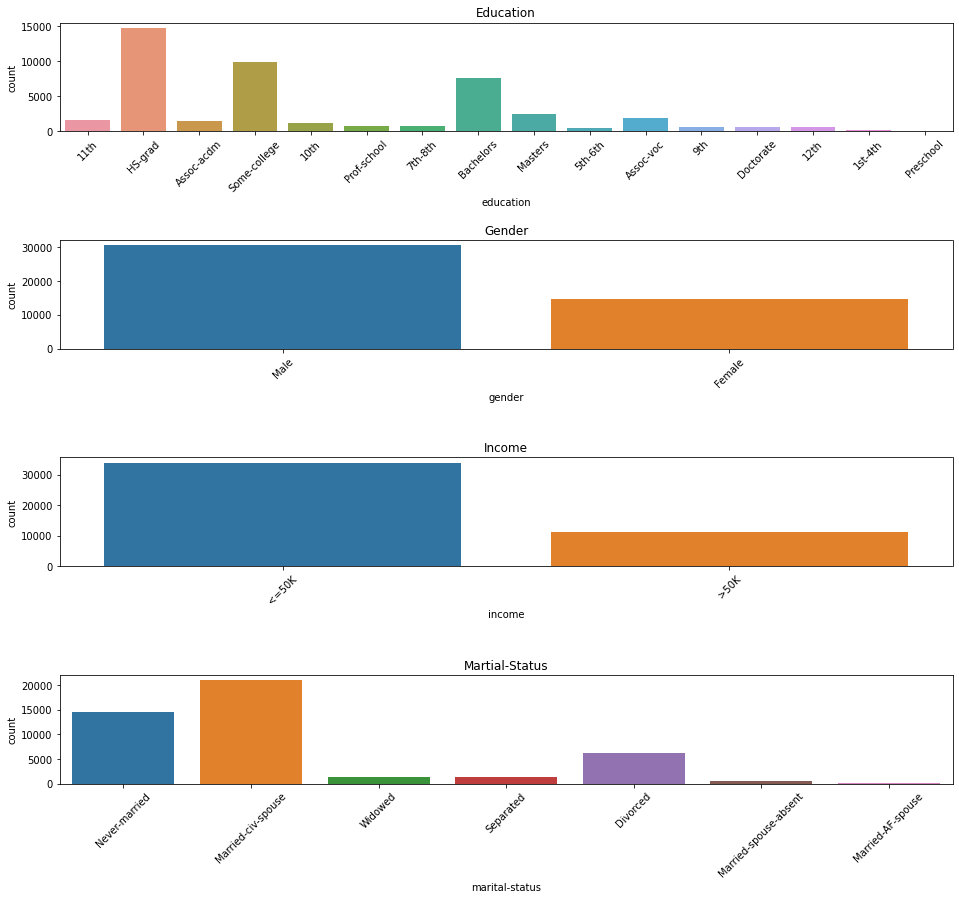

In [147]:
plt.figure(figsize=(16,14))
plt.subplots_adjust(hspace=1,wspace=1)
plt.subplot(4,1,1)
sns.countplot(df['education'])
plt.xticks(rotation = 45)
plt.title('Education')
plt.subplot(4,1,2)
sns.countplot(df['gender'])
plt.xticks(rotation = 45)
plt.title('Gender')
plt.subplot(4,1,3)
sns.countplot(df['income'])
plt.xticks(rotation = 45)
plt.title('Income')
plt.subplot(4,1,4)
sns.countplot(df['marital-status'])
plt.xticks(rotation = 45)
plt.title('Martial-Status')

<h3><b> Observations </b></h3>

<b> Education</b>
 - most of the people in dataset are HS-graduate
 - few people(1-2) are belong to 1st-4th standard
 - none are belong to pre-school
 - approx 14500 people are HS-graduate

<b>Gender</b>
 - There are more male workers than female
 - apprx 66% are male and 34% are female
 - Data shows imbalance % of working men and women and shows male dominance

<b>Income</b>
 - Most of the people having salary less than 50k
 - more than 30k people having salary less than 50K and approx 13K people having salary above 50K
 - aaprox 75% having income less than 50K and 25% having salary more than 50K

<b>Martial-Status</b>
 - most of the people are married-civ-spouse
 - very few people are married-af-spouse 
 - approx 20000 people are married-civ-spouse



Text(0.5, 1.0, 'Occupation')

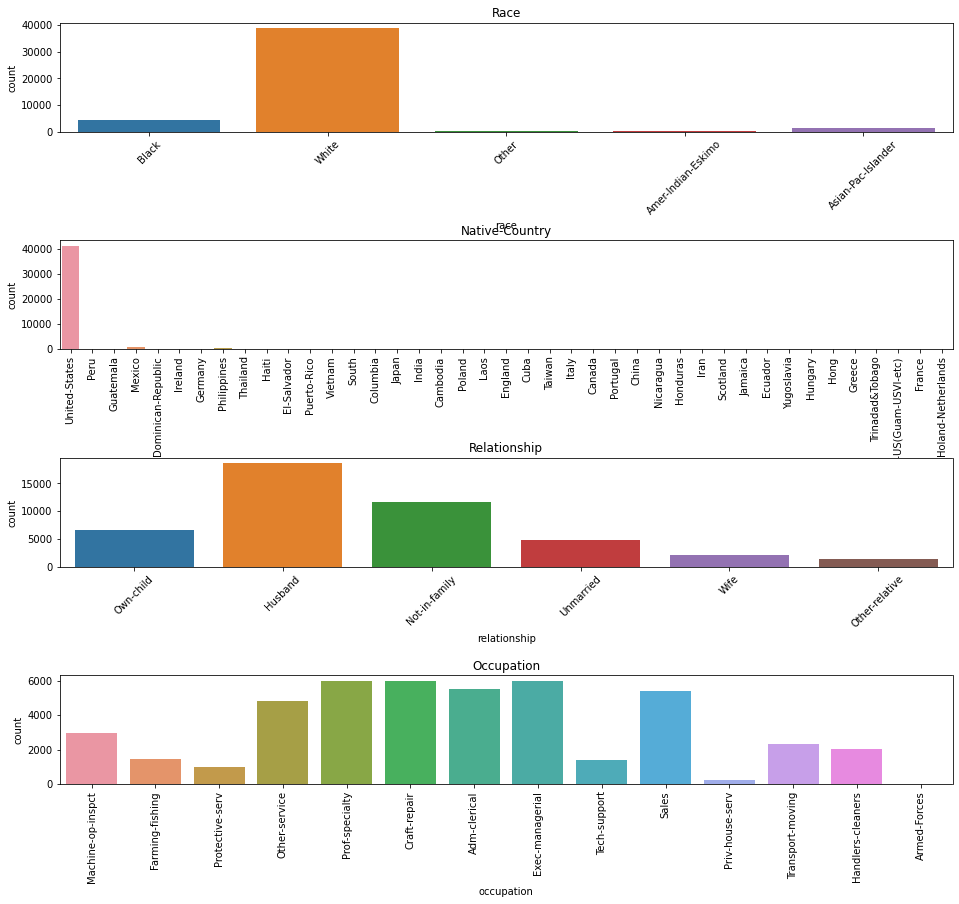

In [148]:
plt.figure(figsize=(16,14))
plt.subplots_adjust(hspace=1,wspace=1)
plt.subplot(4,1,1)
sns.countplot(df['race'])
plt.xticks(rotation = 45)
plt.title('Race')
plt.subplot(4,1,2)
sns.countplot(df['native-country'])
plt.xticks(rotation =90)
plt.title('Native-Country')
plt.subplot(4,1,3)
sns.countplot(df['relationship'])
plt.xticks(rotation = 45)
plt.title('Relationship')
plt.subplot(4,1,4)
sns.countplot(df['occupation'])
plt.xticks(rotation = 90)
plt.title('Occupation')

<h3><b>Observations</b></h3>

<b>Race</b>
  - In the dataset most of the people are white
  - very less majority of black and other race
  - It show racism
  - approx 80% are white ,15% are black, 5% are other 3

<b>Native Country</b>
 -  Most of the people(approx all) are resident of US
 - very few people are from other countries

<b>Relationship</b>
 - most of the people are husband or a person not in family
 - few people are other relative

<b>Occupation</b>
 - most of people are proff-speciality,craft-repair &Exec-mangerial
 - very few people are private-house-servant
 - and very very less approx 14 people are from armed forces


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

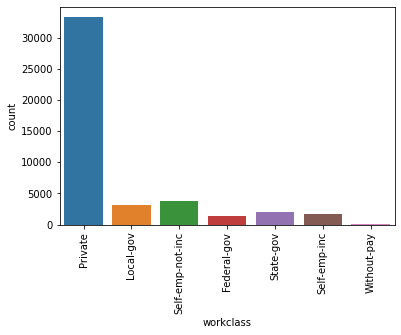

In [149]:
sns.countplot(df['workclass'])
plt.xticks(rotation=90)

<h3><b>Observations</b></h3>

 - We can calculate no of persons in different working sector
 - We can observe from above graph that there is above 30000 people who are from private sector
 - There is few people who are working but they not get payment, we can say that they may be doing internship or may be owner of company who pay others
 - After private sector workers we can say that they are around 4000-4500 people are self employee but not in incorporation
 - There are very few people who never worked

<h1><b>Bivariate Analysis</b></h1>

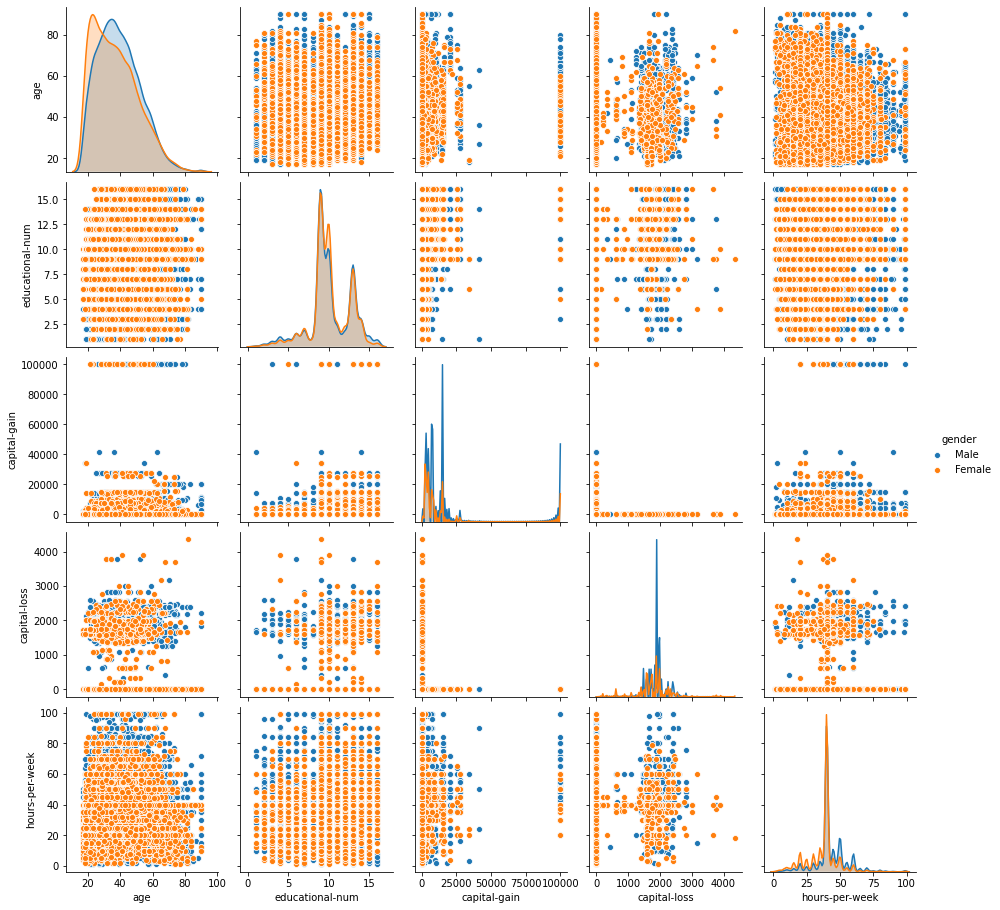

In [150]:
sns.pairplot(df,hue='gender')

<b><h3>Observations</h3></b>
 - This pair plot show high correation of columns with itself only
 - There is no relation blw a one column to other columns
 - We can see above there is two much scattering of data blw two different columns so we cannot interpret any correlation blw two different columns
 - Also there are two much numbers of male as compare to females 

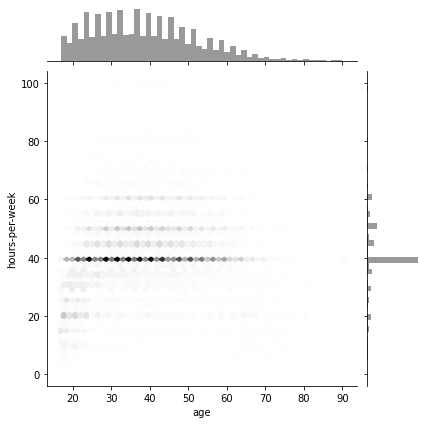

In [151]:
sns.jointplot(x=df.age,y=df['hours-per-week'],kind='hex',color='black')

<h3><b>Observations</b></h3>

  -  Mostly People having age blw 20-50 is 40 hours-per-week
  - Average working hour-per-week is 40 is observe using this plot

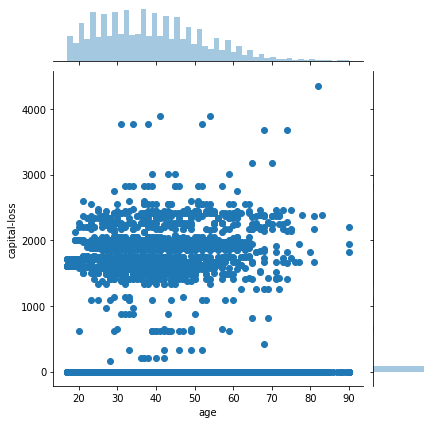

In [152]:
sns.jointplot(x=df['age'],y=df['capital-loss'],kind='scatter')

<h3><b>Observations</h3></b>

 - Too much scattering of data
 - Can't determine any relation blw these two columns

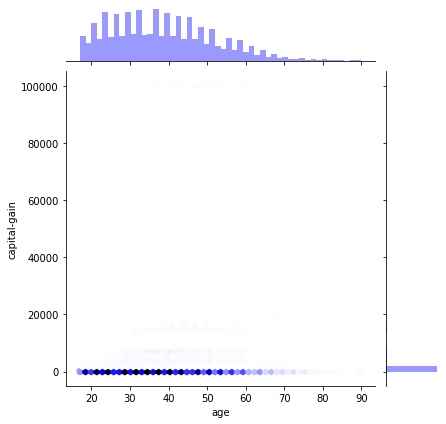

In [153]:
sns.jointplot(x=df['age'],y=df['capital-gain'],kind='hex',color='blue')

<h3><b>Observations</h3></b>

 - mostly people having age blw 20-50 have 0 capital- gain
 - Also capital gain values is almosst 0 to every points

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

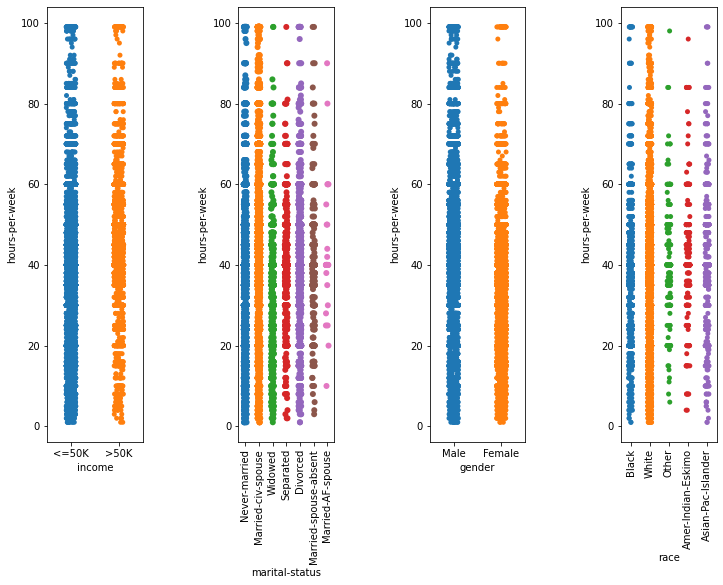

In [154]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=1)
plt.subplot(1,4,1)
sns.stripplot(x='income',y='hours-per-week',data=df)
plt.subplot(1,4,2)
sns.stripplot(x='marital-status',y='hours-per-week',data=df,size=6)
plt.xticks(rotation=90)
plt.subplot(1,4,3)
sns.stripplot(x='gender',y='hours-per-week',data=df)
plt.subplot(1,4,4)
sns.stripplot(x='race',y='hours-per-week',data=df)
plt.xticks(rotation=90)

<h3><b>Observations</b></h3>

- Persons less than 50K income work more compare to persons having income more than 50K
- Persons who are married-civ-spouse are more working hours as compare to others
- Also people who are never-married and divorrced their are also high working hours
- Male works more compare to women
- hours-per-week for male is highly dense this means working hours of men is more as compare to women
- hours-per-week of whites is highly dense this means working hour of whites are more compare to others



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

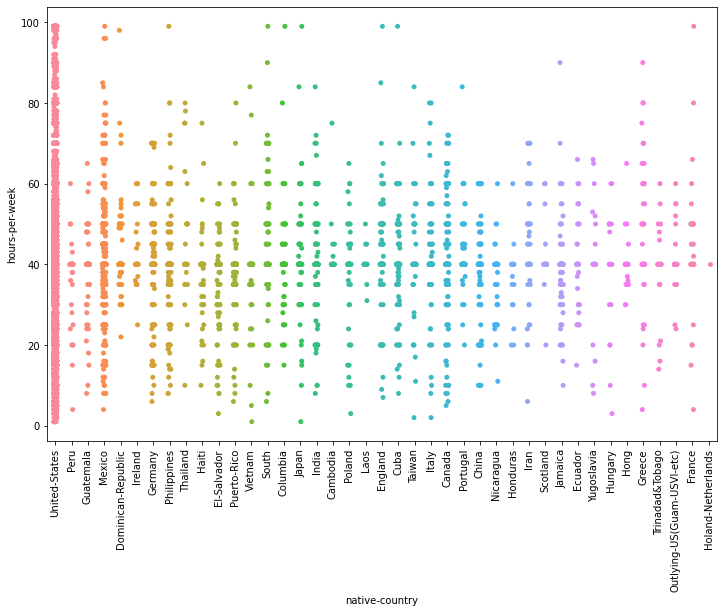

In [155]:

plt.figure(figsize=(12,8))
sns.stripplot(x='native-country',y='hours-per-week',data=df)
plt.xticks(rotation=90)

<b><h3>Observations</h3></b>
- Many many people having dense working hours are resident of US
- means US residents having more working hours
- Also Mexico residents working hour is also high

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

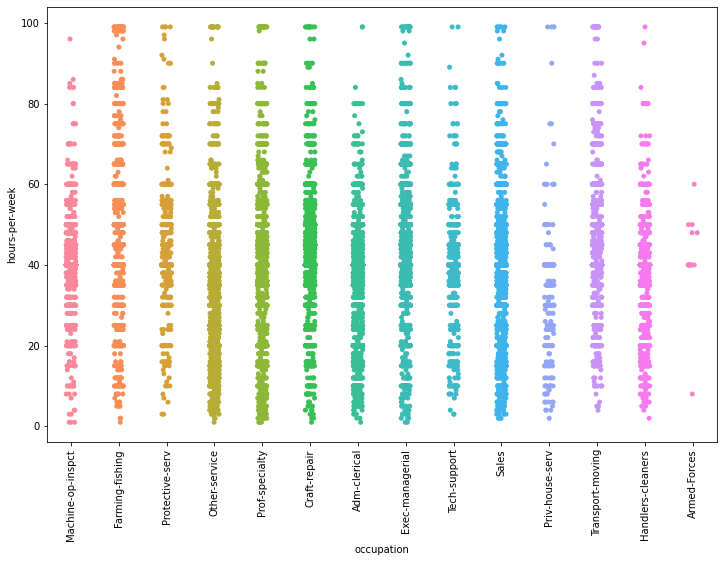

In [156]:
plt.figure(figsize=(12,8))
sns.stripplot(x='occupation',y='hours-per-week',data=df)
plt.xticks(rotation=90)

<b><h3>Observations</h3></b>
- Sales having highly dense working hours, sales require more working time compare to others
- Also prof-speciality,other-service,adm-clerical have dense working hours

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

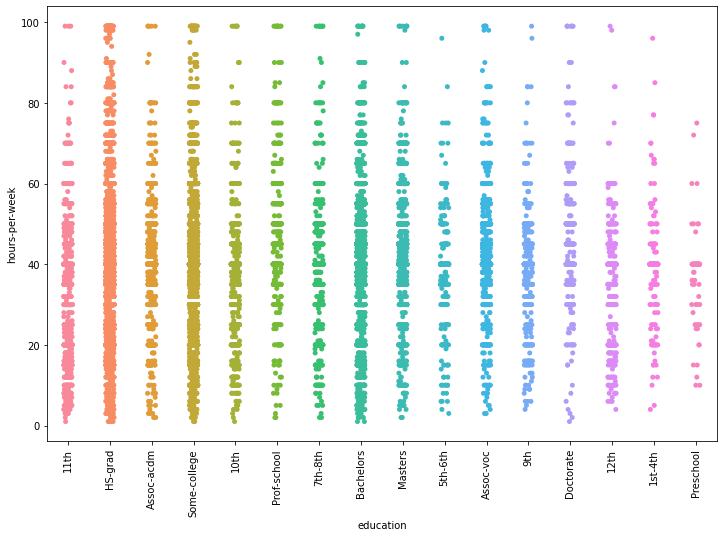

In [157]:
plt.figure(figsize=(12,8))
sns.stripplot(x='education',y='hours-per-week',data=df)
plt.xticks(rotation=90)


<h3><b>Observations</b></h3>

- HS graduate,some-college having highly dense working hours graph means HS graduate working time is more as compare to others
- Also Students who did Bachelors also having high working hours

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

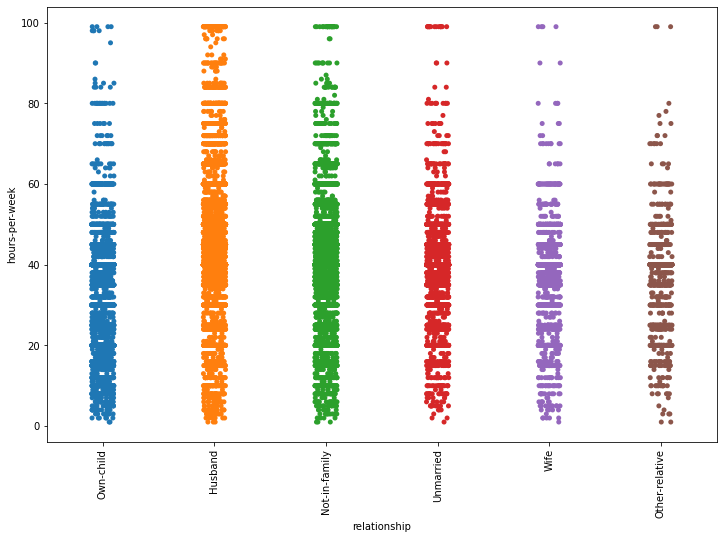

In [158]:
plt.figure(figsize=(12,8))
sns.stripplot(x='relationship',y='hours-per-week',data=df)
plt.xticks(rotation=90)

<h3><b>Observations</b></h3>
 
 - Married people specially husband having more working time as compare to others
 - People who having child,people who are not in family and also unmarried people having more working time

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

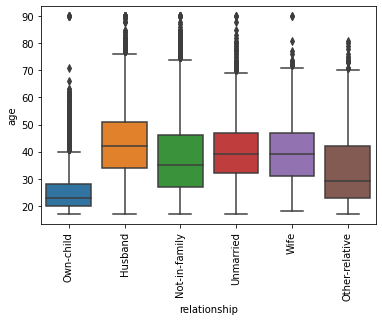

In [159]:
sns.boxplot(x='relationship',y='age',data=df)
plt.xticks(rotation=90)

<b><h3>Observations</b></h3>
 - average age of a person having a child is approx 23 and it is minimum average age according to above plot
 - average age of husband is approx 42 and it is maximum average age according to above plot
 - wife and unmarried both having average age 40
 - maximum age of a person having a child is 40 above this age all are treated as outliers

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

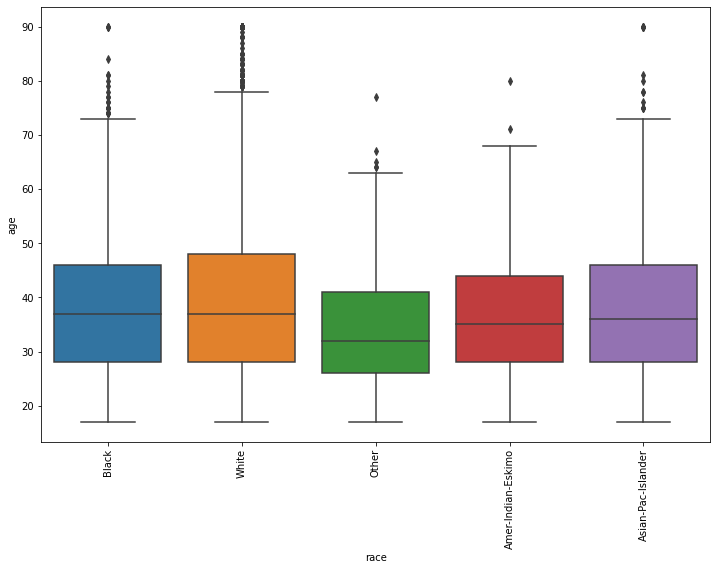

In [160]:
plt.figure(figsize=(12,8))
sns.boxplot(x='race',y='age',data=df)
plt.xticks(rotation=90)

<b><h3>Observations</h3></b>
 - Avearge age of both black and white is approx same i.e around 37
 - Average age of Amer-Indian-Eskimo and asian-pac-islander is around 35 and 36 respectively.
 - 75% of whites in dataset are most mature person
 - above 78 age of whites are treated as outliers
 - above 73 age of black and asian-pac-islander are treated as outliers
 - more outliers are found in white race

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

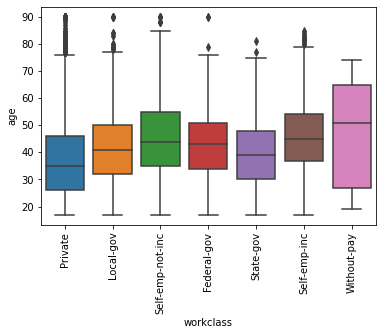

In [161]:
sns.boxplot(x='workclass',y='age',data=df)
plt.xticks(rotation=90)

<h3><b>Observations</b></h3>

- People who are from without-pay worksclass are having average age around 50 it has highest average in dataset
- people are from private sector there avearge age is around 35.
- we observe before there is too much people in private sector,also from this graph there so much outliers in private so we can conclude  that maximum age of private sector is around 75 and above this all are outliers
- people who never worked there maximum age is 25 so we can say before this age all people complete their education and start doing working.

In [1]:
sns.boxplot(x='marital-status',y='age',data=df)
plt.xticks(rotation=90)

NameError: name 'sns' is not defined

<h3><b>Observations</b></h3>

 - There are very few married-af-spouse in dataset and their average is approx 32
 - average age of unmarried is approx 26 and there are lot of unmarried people in dataset whose age is more than 50 they are treated as outliers
 - Average age of married-civilian-spouse is around 43, there are most people in dataset are married-civ-spouse

<h1><b>Conclusion</b></h1>

 - There are total 48842 rows, but there are some missing values in that rows so if we remove missing value we get 45222 rows ,this rows is useful for EDA
 - There are 6 numerical columns and 9 categorial columns
 - Average age in dataset is 37(maximum age found in dataset is 90)
 - Avearge working hour-per-week is 40
 - In Capital-gain there are 40000 values having in the range blw 0-10000
 - In Capital-loss there are around 40000 values having in the range 0-1000
 - Most of the people are residents of United States
 - Most of the people are having white race (it show race discrimination or not properly show data of othe race)
 - There are high majority of male as compare to women (it shows male dominance)
 - There are most of the people have income less than 50K
 - People who are married-civ-spouse specially husband having more working hours
 - In the dataset most of the people are literate or we can say that most people are graduate
 - Mostly people are working for private sector
 - Male works more than female and also they high income as compare to women
 - Also In the dataset both capital-gain and capital-loss having most values near about zero(0)

<h1><b>Research Work</b></h3>

In [0]:
scaling=MinMaxScaler()
df[['age','hours-per-week','educational-num','capital-gain','capital-loss']]=scaling.fit_transform(df[['age','hours-per-week','educational-num','capital-gain','capital-loss']])


In [164]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
5,0.232877,Private,10th,0.333333,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,0.295918,United-States,<=50K


In [165]:
dummy_var=pd.get_dummies(df,columns=['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income'])
dummy_var.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,...,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,0.109589,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.287671,0.533333,0.000000,0.0,0.500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0.150685,0.733333,0.000000,0.0,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.369863,0.600000,0.076881,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,0.232877,0.333333,0.000000,0.0,0.295918,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [167]:
dummy_var.shape

(45222, 105)